# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

**Data Collection**

In [154]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here


**Data Understanding**


In [126]:
crops.dtypes

N         int64
P         int64
K         int64
ph      float64
crop     object
dtype: object

In [111]:
crops.shape

(2200, 5)

In [112]:
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [113]:
crops['crop'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

In [33]:
crops['crop'].nunique()

22

In [21]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [29]:
crops.isnull().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

**Data Wrangling**

In [155]:
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


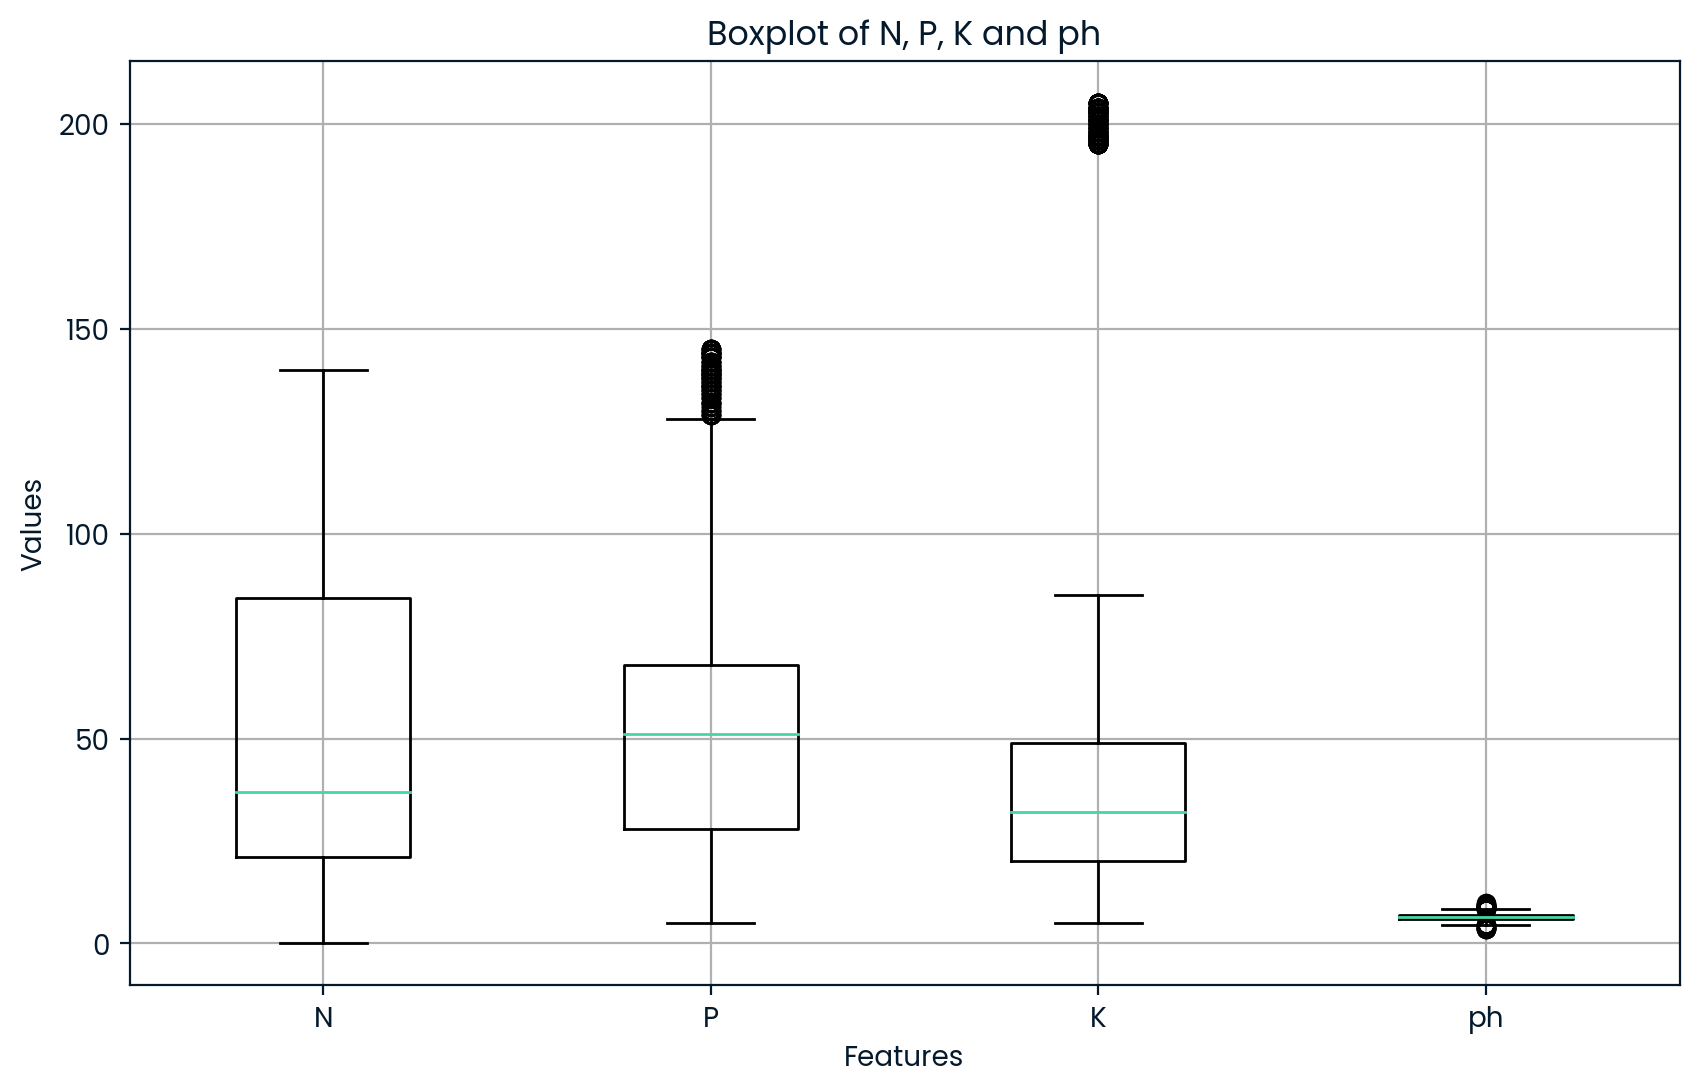

In [156]:
import matplotlib.pyplot as plt

# Boxplot of N, P, K and ph columns
plt.figure(figsize=(10, 6))
plt.boxplot([crops['N'], crops['P'], crops['K'], crops['ph']], labels=['N', 'P', 'K', 'ph'])
plt.title('Boxplot of N, P, K and ph')
plt.xlabel('Features')
plt.ylabel('Values')
plt.grid(True)
plt.show()

### As shown in the boxplot, there are some outliers in the dataset. In this case, we will use RobustScaler for normalization to improve data modeling, as this technique is less sensitive to outliers.

In [157]:
x= crops[['N', 'P', 'K', 'ph']]
y = crops[['crop']]

In [145]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(crops_features), columns=crops_features.columns)

In [158]:
x.head()

,N,P,K,ph
0,90,42,43,6.502985
1,85,58,41,7.038096
2,60,55,44,7.840207
3,74,35,40,6.980401
4,78,42,42,7.628473


In [92]:
y.head()

,crop
0,rice
1,rice
2,rice
3,rice
4,rice


**Exploratory Data Analysis - EDA**

In [159]:
# correlation of all independent features (numerics) ('N','P','K','ph')
correlation_matrix = x.corr()

In [160]:
correlation_matrix

,N,P,K,ph
N,1.000000,-0.231460,-0.140512,0.096683
P,-0.231460,1.000000,0.736232,-0.138019
K,-0.140512,0.736232,1.000000,-0.169503
ph,0.096683,-0.138019,-0.169503,1.000000


**P and K has a strong correlation, 0.7362322172**

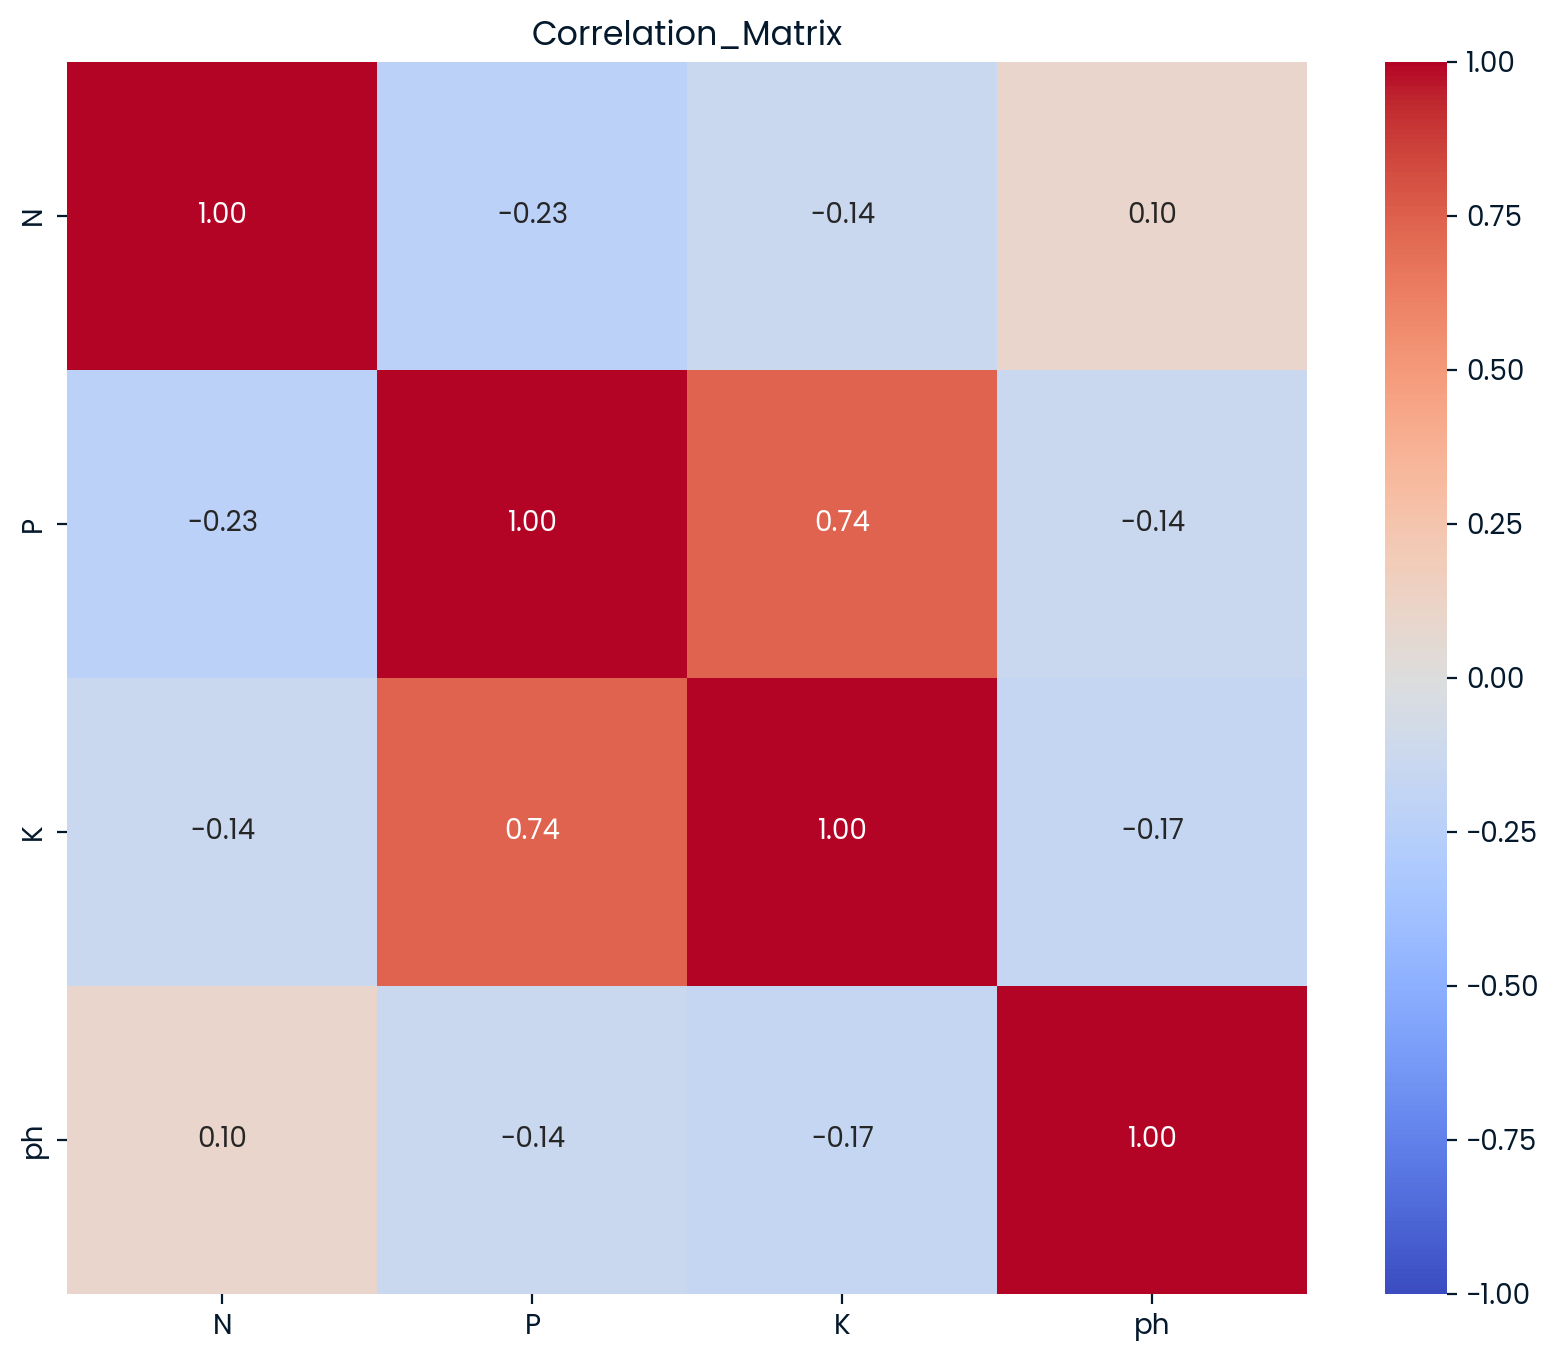

In [161]:
import seaborn as sns

# plot of heatmap showing the strenght of correlation between the independent features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation_Matrix')
plt.show()

**Model Development**

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [163]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1760, 4)
(1760, 1)
(440, 4)
(440, 1)


In [164]:
x_train.head()

,N,P,K,ph
1656,17,16,14,6.625539
752,37,79,19,7.143943
892,7,73,25,7.288057
1041,101,70,48,6.012697
1179,0,17,30,6.279134


In [165]:
# predictive performance of features
from sklearn.metrics import f1_score

features_dict = {}

for feature in ["N", "P", "K", "ph"]:
    
    # creation and training the model with Logistic Regression
    log_reg = LogisticRegression(multi_class="multinomial", max_iter=1000, random_state=42)
    log_reg.fit(x_train[[feature]], y_train)
    
    # prediction 
    y_pred = log_reg.predict(x_test[[feature]])
    
    # calculate F1-Score
    feature_performance = f1_score(y_test, y_pred, average="weighted")
    
    # store the performance of each feature
    features_dict[feature] = feature_performance
    
    print(f"F1-score for {feature}: {feature_performance:.4f}")
    
    

F1-score for N: 0.1011
F1-score for P: 0.1278
F1-score for K: 0.2025
F1-score for ph: 0.0453


**Comparison of using different types of normalization or none**

In [124]:
# Without Normalization
features_dict

{'N': 0.10110745601353237,
 'P': 0.12780698923278647,
 'K': 0.2024600300188763,
 'ph': 0.04532731061152114}

In [107]:
# Using RobustScaler for normalization
features_dict

{'N': 0.0894285098590696,
 'P': 0.08557567486516855,
 'K': 0.1389167424350493,
 'ph': 0.045406635484660444}

In [139]:
# Using StandardScaler for normalization
features_dict

{'N': 0.10689900116508289,
 'P': 0.08426955444720076,
 'K': 0.13831456375684123,
 'ph': 0.045464856528065166}

In [153]:
# Using MinMaxScaler for normalization
features_dict

{'N': 0.0804495236318966,
 'P': 0.06302234386698227,
 'K': 0.09279573968487996,
 'ph': 0.032576899098197276}

### Finding the best feature for this model, based on F1-Score

In [172]:
best_feature = max(features_dict, key=features_dict.get)
best_performance = features_dict[best_feature]

In [169]:
best_feature

'K'

In [171]:
features_dict[best_feature]

0.2024600300188763

In [173]:
best_predictive_feature = {best_feature: best_performance}

In [193]:
print(f"Best feature and its F1-Score in this model, using Logistic Regression and with no normalization:                   {best_predictive_feature}")

Best feature and its F1-Score in this model, using Logistic Regression and with no normalization:                   {'K': 0.2024600300188763}


#

#

# CONCLUSION

### The machine learning technique chosen, which was "Logistic Regression," did not result in a good F1-Score based on the characteristics of the dataset and the type of training without cross-validation.
### The results are not satisfactory for building a model with these specific characteristics.
### Other approaches should be considered in this case, such as trying different machine learning classification algorithms, using cross-validation during model training, or even exploring the possibility of augmenting the dataset to achieve different results.